## Missing Categorical Data

we can fill the missing data in two ways 

#### 1.1 Most Frequent Missing imputation- we fill the values with mode

Assumption 1.1 Data is randomly missing MSAR
1.2 the mode values should high compare to other column

#### 1.2Missing Category Imputation- if missing data is greater than 10% and data is not randomly missingn then we use this method i.e we create new category and add all values in that category

easy to implement but randomness is created which is not goood


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])


In [10]:
df

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
5,NaN,TA,143000
6,Gd,TA,307000
7,TA,TA,200000
8,TA,Fa,129900
9,TA,Gd,118000


In [11]:
df.isnull().mean()*100


FireplaceQu    45.000000
GarageQual      3.333333
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Number of houses')

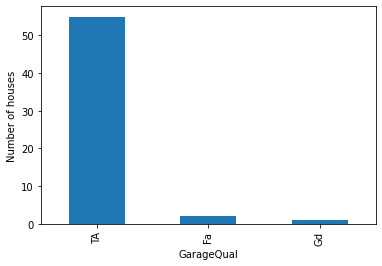

In [12]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [13]:
df['GarageQual'].fillna('Missing', inplace=True)


Text(0, 0.5, 'Number of houses')

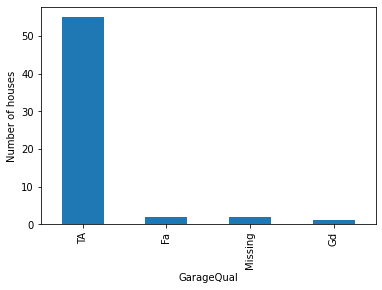

In [14]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant',fill_value='Missing')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)
imputer.statistics_


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array(['Missing', 'Missing'], dtype=object)

In [16]:
df2 = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])


In [17]:
df2.head()


,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [18]:
df2.isnull().mean()*100


FireplaceQu    45.000000
GarageQual      3.333333
SalePrice       0.000000
dtype: float64

<AxesSubplot:>

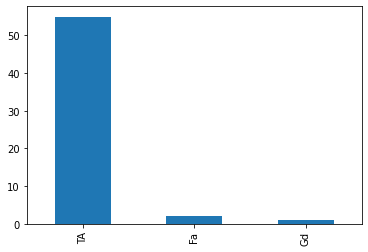

In [19]:
df2['GarageQual'].value_counts().plot(kind='bar')


In [20]:
df['GarageQual'].mode()


0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

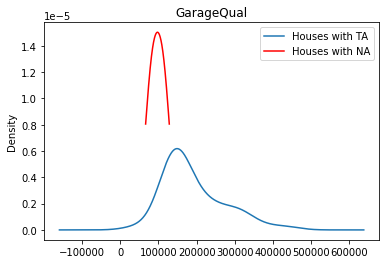

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

df2[df2['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

df2[df2['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

In [23]:
temp = df2[df2['GarageQual']=='TA']['SalePrice']


In [24]:
df2['GarageQual'].fillna('TA', inplace=True)

<AxesSubplot:>

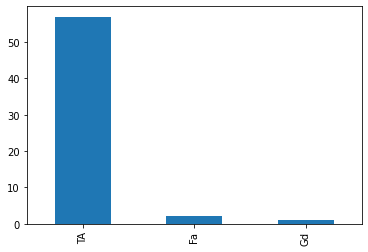

In [25]:
df2['GarageQual'].value_counts().plot(kind='bar')


Text(0.5, 1.0, 'GarageQual')

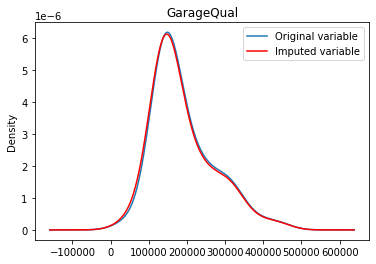

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df2[df2['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

<AxesSubplot:>

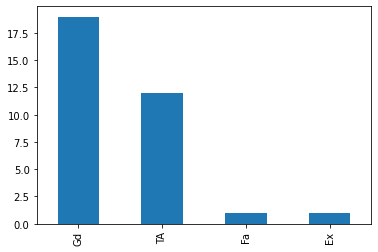

In [27]:
df2['FireplaceQu'].value_counts().plot(kind='bar')


In [28]:
df2['FireplaceQu'].mode()


0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

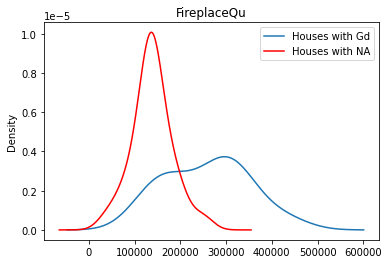

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

df2[df2['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df2[df2['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

<AxesSubplot:>

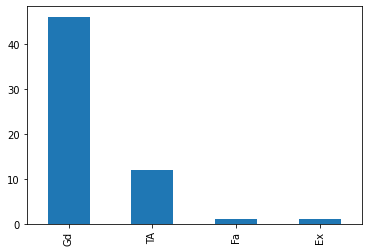

In [30]:
temp = df2[df2['FireplaceQu']=='Gd']['SalePrice']
df2['FireplaceQu'].fillna('Gd', inplace=True)
df2['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

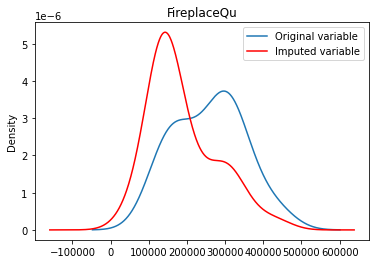

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df2[df2['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)
imputer.statistics_


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array(['Gd', 'TA'], dtype=object)